In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Decision Tree
from sklearn.model_selection import train_test_split, KFold

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score, recall_score, precision_score, ConfusionMatrixDisplay


# Decision Trees

## 1. Explore

In [4]:
gpa = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/CCfraud.csv")

#(ggplot(gpa, aes()) + geom_bar())
gpa.head()

,fraud,home,amount,cashBack
0,0,1,81.217853,0
1,0,1,67.879223,0
2,0,1,75.989902,0
3,0,1,67.462833,0
4,0,0,62.610021,0


## 2. Build Model

In [8]:
X = gpa[["home","amount","cashBack"]]
y = gpa["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()

z.fit(X_train[["amount"]])

X_train["amount"] = z.transform(X_train[["amount"]])
X_test["amount"] = z.transform(X_test[["amount"]])

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)





DecisionTreeClassifier()

## 3. Evaluate Model

In [9]:
#metrics
print("Train Acc: ", accuracy_score(y_train, tree.predict(X_train)))
print("Test Acc: ", accuracy_score(y_test, tree.predict(X_test)))

print("TEST Precision : ", precision_score(y_test, tree.predict(X_test)))
print("TRAIN Precision: ", precision_score(y_train, tree.predict(X_train)))

print("TEST Recall : ", recall_score(y_test, tree.predict(X_test)))
print("TRAIN Recall: ", recall_score(y_train, tree.predict(X_train)))

print("TEST ROC/AUC : ", roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))
print("TRAIN ROC/AUC: ", roc_auc_score(y_train, tree.predict_proba(X_train)[:,1]))

Train Acc:  1.0
Test Acc:  0.825
TEST Precision :  0.8636363636363636
TRAIN Precision:  1.0
TEST Recall :  0.8260869565217391
TRAIN Recall:  1.0
TEST ROC/AUC :  0.8248081841432225
TRAIN ROC/AUC:  1.0


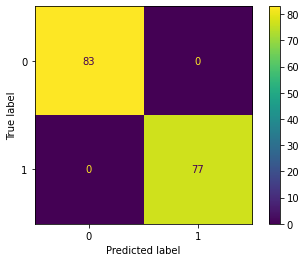

In [10]:
# confusion

ConfusionMatrixDisplay.from_predictions(y_train, tree.predict(X_train))

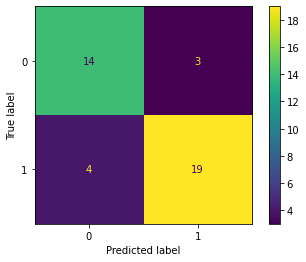

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, tree.predict(X_test))

## Max Depth and Number of Leaves

In [12]:
tree.get_depth()

9

In [13]:
tree.get_n_leaves()

37

In [14]:
# model
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [15]:
print("TEST ACC : ", accuracy_score(y_test, tree.predict(X_test)))
print("TRAIN ACC: ", accuracy_score(y_train, tree.predict(X_train)))

print("TEST Precision : ", precision_score(y_test, tree.predict(X_test)))
print("TRAIN Precision: ", precision_score(y_train, tree.predict(X_train)))

print("TEST Recall : ", recall_score(y_test, tree.predict(X_test)))
print("TRAIN Recall: ", recall_score(y_train, tree.predict(X_train)))

print("TEST ROC/AUC : ", roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))
print("TRAIN ROC/AUC: ", roc_auc_score(y_train, tree.predict_proba(X_train)[:,1]))

TEST ACC :  0.8
TRAIN ACC:  0.89375
TEST Precision :  0.8571428571428571
TRAIN Precision:  0.8947368421052632
TEST Recall :  0.782608695652174
TRAIN Recall:  0.8831168831168831
TEST ROC/AUC :  0.90153452685422
TRAIN ROC/AUC:  0.9510248787357221


In [18]:
tree.get_depth()

3

## Min Leaf Samples

In [20]:
tree = DecisionTreeClassifier(min_samples_leaf = 10)
tree.fit(X_train, y_train)

print("TEST ACC : ", accuracy_score(y_test, tree.predict(X_test)))
print("TRAIN ACC: ", accuracy_score(y_train, tree.predict(X_train)))

print("TEST Precision : ", precision_score(y_test, tree.predict(X_test)))
print("TRAIN Precision: ", precision_score(y_train, tree.predict(X_train)))

print("TEST Recall : ", recall_score(y_test, tree.predict(X_test)))
print("TRAIN Recall: ", recall_score(y_train, tree.predict(X_train)))

print("TEST ROC/AUC : ", roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))
print("TRAIN ROC/AUC: ", roc_auc_score(y_train, tree.predict_proba(X_train)[:,1]))

TEST ACC :  0.8
TRAIN ACC:  0.89375
TEST Precision :  0.8571428571428571
TRAIN Precision:  0.8947368421052632
TEST Recall :  0.782608695652174
TRAIN Recall:  0.8831168831168831
TEST ROC/AUC :  0.9053708439897699
TRAIN ROC/AUC:  0.958066030355187


In [21]:
tree.get_depth()

4

## Other Options
You can actually limit tree complexity in a few ways. We learned about `max_depth` and `min_samples_leaf`, but you can also choose how many samples need to be in an internal node for us to split (`min_samples_split`), limit the number of leaf nodes allowed (`max_leaf_nodes`), or require a split to reduce the impurity/entropy by *at least* a certain amount before allowing a split (`min_impurity_decrease`), and more!

The idea for all of them, though is to create a tree that is not overfit.

## Variable/Feature Importance

In [23]:
tree.feature_importances_

array([0.10212443, 0.8734689 , 0.02440667])

# Another Example

In [24]:
heart = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


[0.6431718061674009, 0.6960352422907489, 0.6872246696035242, 0.7017543859649122]
0.6820465260066465
[0.5921052631578947, 0.6447368421052632, 0.6710526315789473, 0.6133333333333333]
0.6303070175438596
[2, 2, 2, 2]


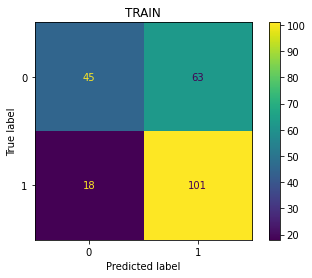

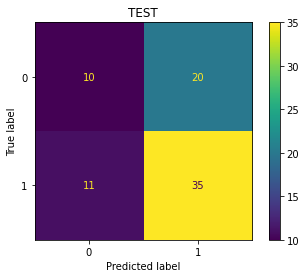

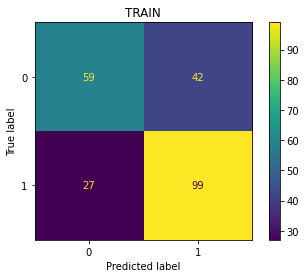

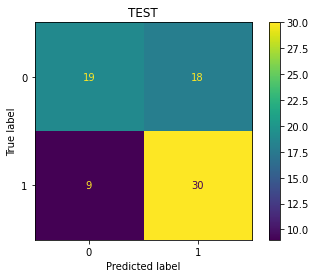

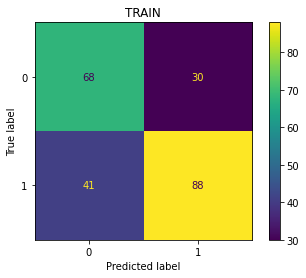

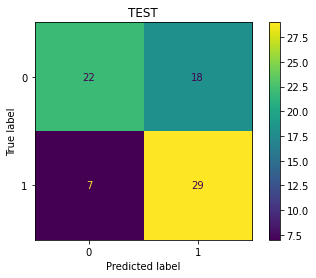

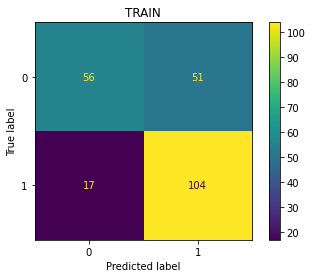

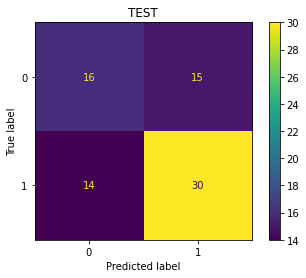

In [26]:
predictors = ["sex", "age", "restecg", "chol"]

X = heart[predictors]
y = heart["target"]

kf = KFold(n_splits = 4, shuffle = True)

acc_train = []
acc_test = []

depth = []

for train, test in kf.split(X):
  X_train = X.iloc[train]
  X_test = X.iloc[test]
  y_train = y[train]
  y_test = y[test]

  # z
  z = StandardScaler()

  X_train[["age", "chol"]] = z.fit_transform(X_train[["age", "chol"]])
  X_test[["age", "chol"]] = z.transform(X_test[["age", "chol"]])

  tree = DecisionTreeClassifier(min_samples_leaf = 20, max_depth = 2)
  tree.fit(X_train, y_train)

  acc_train.append(accuracy_score(y_train, tree.predict(X_train)))
  acc_test.append(accuracy_score(y_test, tree.predict(X_test)))

  depth.append(tree.get_depth())

  ConfusionMatrixDisplay.from_predictions(y_train, tree.predict(X_train))
  plt.title("TRAIN")
  ConfusionMatrixDisplay.from_predictions(y_test, tree.predict(X_test))
  plt.title("TEST")


print(acc_train)
print(np.mean(acc_train))

print(acc_test)
print(np.mean(acc_test))

print(depth)

# Regression Trees

Regression Trees are built in the same way as Decision Trees, but:

1. The output is continuous (like Linear Regression)
2. Instead of Gini Impurity/Entropy we can use things like the MSE, MAE, Sum of Squared Errors.
3. The prediction for each leaf node is the mean of the data points in that node, (rather than the mode)

In [27]:
wine = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/wineLARGE.csv")

wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
predictors = ["density", "fixed.acidity", "volatile.acidity", "residual.sugar"]

X = wine[predictors]
y = wine["alcohol"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

z = StandardScaler()

X_train[predictors] = z.fit_transform(X_train[predictors])
X_test[predictors] = z.transform(X_test[predictors])

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

print("MSE TRAIN: ", mean_squared_error(y_train, tree.predict(X_train)))
print("MSE TEST : ", mean_squared_error(y_test, tree.predict(X_test)))

tree = DecisionTreeRegressor(min_samples_leaf = 10, max_depth = 3)
tree.fit(X_train, y_train)

print("MSE TRAIN: ", mean_squared_error(y_train, tree.predict(X_train)))
print("MSE TEST : ", mean_squared_error(y_test, tree.predict(X_test)))

MSE TRAIN:  8.284694161151696e-07
MSE TEST :  0.4125325405982906
MSE TRAIN:  0.5876561996403655
MSE TEST :  0.6474081418224843
